In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import pandas as pd
import numpy as np
import pickle

In [104]:
path = '/home/mragletdinov/new_science/data'
path2 = '/home/mragletdinov/new_science/Intersection_by_repFamily/data'

## Рассчитаем среднее число ожидаемых сайтов редактирования (среди смоделированных) на каждый повтор

In [105]:
with open(f'{path}/real_edits.pickle', 'rb') as f:
    number_of_real_edits_by_RepName = pickle.load(f)

In [107]:
number_of_real_edits_by_RepName = number_of_real_edits_by_RepName.query('EditingSites > 100')

In [108]:
number_of_real_edits_by_RepName = dict(zip(number_of_real_edits_by_RepName.RepName, number_of_real_edits_by_RepName.EditingSites))

In [7]:
number_of_real_edits_by_RepName

{'AluJb': 1761721,
 'AluSx1': 1669764,
 'AluSx': 1588303,
 'AluSz': 1579210,
 'AluJr': 1025100,
 'AluJo': 916035,
 'AluY': 825788,
 'AluSq2': 822568,
 'AluSz6': 706933,
 'AluSp': 669694,
 'AluSg': 500693,
 'Repeat-free': 463387,
 'AluSc': 397580,
 'AluSx3': 387446,
 'AluSq': 250801,
 'AluSc8': 247285,
 'AluJr4': 236724,
 'AluSx4': 136470,
 'AluSg7': 108524,
 'AluSg4': 93282,
 'FLAM_C': 74399,
 'AluSc5': 73375,
 'AluYm1': 34839,
 'THE1B': 30973,
 'L1PA7': 29477,
 'FLAM_A': 28305,
 'AluSq4': 25158,
 'L1PA16': 24785,
 'FRAM': 24550,
 'AluYc': 23543,
 'MSTA': 21370,
 'AluSq10': 20343,
 'AluYj4': 18774,
 'THE1D': 17568,
 'L1PA15': 17477,
 'L1PA13': 17165,
 'L1PREC2': 16734,
 'AluYh3': 15189,
 'L1PB1': 15005,
 'AluYf1': 14981,
 'THE1C': 14877,
 'L1MB7': 14558,
 'L1PA10': 14033,
 'L1PA8': 13170,
 'L1MA4': 11833,
 'L1MA9': 11829,
 'L1PA5': 11748,
 'L1MA3': 11616,
 'L1MB3': 11457,
 'MIRb': 10471,
 'L1PA6': 10327,
 'L1PB4': 10246,
 'L1MB8': 10128,
 'L1PA4': 10070,
 'FAM': 9868,
 'MIR': 9808,
 'L

In [109]:
list_of_number_of_modeling_edits_by_RepName = list()
for i in range(1000):
    with open(f'/home/mragletdinov/new_science/1000_gen_by_Matvey/subdata_for_genes/{i}_generation.pkl', 'rb') as f:
        data_new = pickle.load(f)
    new_dict = dict()
    for i, j in zip(data_new['Family'].values(), data_new['EditingSites'].values()):
        new_dict[i] = j
    list_of_number_of_modeling_edits_by_RepName.append(new_dict)

In [110]:
dict_of_distribution = {x: [] for x in number_of_real_edits_by_RepName.keys()}

In [111]:
for i in list_of_number_of_modeling_edits_by_RepName:
    for j, k in i.items():
        try:
            dict_of_distribution[j].append(k)
        except KeyError:
            pass        

In [112]:
mean_number_of_esites_by_repName = dict()
for repName, list_number_of_esites in dict_of_distribution.items():
    mean_number_of_esites_by_repName[repName] = round(np.array(list_number_of_esites).mean(), 0)

In [17]:
mean_number_of_esites_by_repName

{'AluJb': 141741.0,
 'AluSx1': 151570.0,
 'AluSx': 142997.0,
 'AluSz': 131480.0,
 'AluJr': 96304.0,
 'AluJo': 84881.0,
 'AluY': 123464.0,
 'AluSq2': 76909.0,
 'AluSz6': 57240.0,
 'AluSp': 65051.0,
 'AluSg': 46060.0,
 'Repeat-free': 6754576.0,
 'AluSc': 40384.0,
 'AluSx3': 36692.0,
 'AluSq': 23888.0,
 'AluSc8': 26191.0,
 'AluJr4': 22042.0,
 'AluSx4': 13370.0,
 'AluSg7': 10493.0,
 'AluSg4': 8960.0,
 'FLAM_C': 14569.0,
 'AluSc5': 7678.0,
 'AluYm1': 5030.0,
 'THE1B': 24056.0,
 'L1PA7': 60811.0,
 'FLAM_A': 7667.0,
 'AluSq4': 2257.0,
 'L1PA16': 34297.0,
 'FRAM': 4738.0,
 'AluYc': 3804.0,
 'MSTA': 19294.0,
 'AluSq10': 2093.0,
 'AluYj4': 2825.0,
 'THE1D': 12447.0,
 'L1PA15': 22595.0,
 'L1PA13': 21428.0,
 'L1PREC2': 20170.0,
 'AluYh3': 2297.0,
 'L1PB1': 40632.0,
 'AluYf1': 2085.0,
 'THE1C': 10579.0,
 'L1MB7': 49921.0,
 'L1PA10': 20273.0,
 'L1PA8': 20610.0,
 'L1MA4': 21842.0,
 'L1MA9': 28554.0,
 'L1PA5': 51997.0,
 'L1MA3': 28630.0,
 'L1MB3': 32488.0,
 'MIRb': 165374.0,
 'L1PA6': 33132.0,
 'L1PB4

## Рассчитаем отношение наблюдаемого числа сайтов редактирования к ожидаемому для каждого типа повтора.

In [113]:
with open(f'{path}/real_edits.pickle', 'rb') as f:
    annotation_by_repName = pickle.load(f)

In [114]:
annotation_by_repName

,RepName,EditingSites
0,AluJb,1761721
1,AluSx1,1669764
2,AluSx,1588303
3,AluSz,1579210
4,AluJr,1025100
...,...,...
1758,(CCGCT)n,1
1759,(ATTTAT)n,1
1760,(GAGA)n,1
1761,(TTAC)n,1


In [115]:
annotation_by_repName = dict(zip(annotation_by_repName.RepName, annotation_by_repName.EditingSites))

In [21]:
annotation_by_repName

{'AluJb': 1761721,
 'AluSx1': 1669764,
 'AluSx': 1588303,
 'AluSz': 1579210,
 'AluJr': 1025100,
 'AluJo': 916035,
 'AluY': 825788,
 'AluSq2': 822568,
 'AluSz6': 706933,
 'AluSp': 669694,
 'AluSg': 500693,
 'Repeat-free': 463387,
 'AluSc': 397580,
 'AluSx3': 387446,
 'AluSq': 250801,
 'AluSc8': 247285,
 'AluJr4': 236724,
 'AluSx4': 136470,
 'AluSg7': 108524,
 'AluSg4': 93282,
 'FLAM_C': 74399,
 'AluSc5': 73375,
 'AluYm1': 34839,
 'THE1B': 30973,
 'L1PA7': 29477,
 'FLAM_A': 28305,
 'AluSq4': 25158,
 'L1PA16': 24785,
 'FRAM': 24550,
 'AluYc': 23543,
 'MSTA': 21370,
 'AluSq10': 20343,
 'AluYj4': 18774,
 'THE1D': 17568,
 'L1PA15': 17477,
 'L1PA13': 17165,
 'L1PREC2': 16734,
 'AluYh3': 15189,
 'L1PB1': 15005,
 'AluYf1': 14981,
 'THE1C': 14877,
 'L1MB7': 14558,
 'L1PA10': 14033,
 'L1PA8': 13170,
 'L1MA4': 11833,
 'L1MA9': 11829,
 'L1PA5': 11748,
 'L1MA3': 11616,
 'L1MB3': 11457,
 'MIRb': 10471,
 'L1PA6': 10327,
 'L1PB4': 10246,
 'L1MB8': 10128,
 'L1PA4': 10070,
 'FAM': 9868,
 'MIR': 9808,
 'L

In [116]:
enrichment_by_repName= {}
for repName, number in mean_number_of_esites_by_repName.items():
    enrichment_by_repName[repName] = round(annotation_by_repName[repName] / number , 3)

In [117]:
enrichment_by_repName

{'AluJb': 12.429,
 'AluSx1': 11.016,
 'AluSx': 11.107,
 'AluSz': 12.011,
 'AluJr': 10.644,
 'AluJo': 10.792,
 'AluY': 6.688,
 'AluSq2': 10.695,
 'AluSz6': 12.35,
 'AluSp': 10.295,
 'AluSg': 10.87,
 'Repeat-free': 0.069,
 'AluSc': 9.845,
 'AluSx3': 10.559,
 'AluSq': 10.499,
 'AluSc8': 9.442,
 'AluJr4': 10.74,
 'AluSx4': 10.207,
 'AluSg7': 10.343,
 'AluSg4': 10.411,
 'FLAM_C': 5.107,
 'AluSc5': 9.557,
 'AluYm1': 6.926,
 'THE1B': 1.288,
 'L1PA7': 0.485,
 'FLAM_A': 3.692,
 'AluSq4': 11.147,
 'L1PA16': 0.723,
 'FRAM': 5.182,
 'AluYc': 6.189,
 'MSTA': 1.108,
 'AluSq10': 9.72,
 'AluYj4': 6.646,
 'THE1D': 1.411,
 'L1PA15': 0.773,
 'L1PA13': 0.801,
 'L1PREC2': 0.83,
 'AluYh3': 6.613,
 'L1PB1': 0.369,
 'AluYf1': 7.185,
 'THE1C': 1.406,
 'L1MB7': 0.292,
 'L1PA10': 0.692,
 'L1PA8': 0.639,
 'L1MA4': 0.542,
 'L1MA9': 0.414,
 'L1PA5': 0.226,
 'L1MA3': 0.406,
 'L1MB3': 0.353,
 'MIRb': 0.063,
 'L1PA6': 0.312,
 'L1PB4': 0.691,
 'L1MB8': 0.315,
 'L1PA4': 0.175,
 'FAM': 3.425,
 'MIR': 0.071,
 'L1MA8': 0.4

## Отберем только те повторы, которые попали в анализ p_value (число ожидаемых сайтов редактирования больше 100)

In [119]:
with open(f'{path}/p_val_for_genes.pickle', 'rb') as f:
    p_value_by_repName_FDR = pickle.load(f)

In [120]:
p_value_by_repName_FDR

,RepName,p_value,pval_adj
0,AluJb,0.000,0.0
1,AluSx1,0.000,0.0
2,AluSx,0.000,0.0
3,AluSz,0.000,0.0
4,AluJr,0.000,0.0
...,...,...,...
532,Charlie17,1.000,1.0
533,LTR27E,1.000,1.0
534,MER90,1.000,1.0
535,LTR104_Mam,1.000,1.0


In [121]:
p_value_by_repName_FDR.query("RepName == 'L2a'")

,RepName,p_value,pval_adj
61,L2a,1.0,1.0


In [122]:
enrichment_by_repName_sort = {}
for repName in p_value_by_repName_FDR.RepName:
    enrichment_by_repName_sort[repName] = enrichment_by_repName[repName]

In [123]:
enrichment_by_repName_sort

{'AluJb': 12.429,
 'AluSx1': 11.016,
 'AluSx': 11.107,
 'AluSz': 12.011,
 'AluJr': 10.644,
 'AluJo': 10.792,
 'AluY': 6.688,
 'AluSq2': 10.695,
 'AluSz6': 12.35,
 'AluSp': 10.295,
 'AluSg': 10.87,
 'Repeat-free': 0.069,
 'AluSc': 9.845,
 'AluSx3': 10.559,
 'AluSq': 10.499,
 'AluSc8': 9.442,
 'AluJr4': 10.74,
 'AluSx4': 10.207,
 'AluSg7': 10.343,
 'AluSg4': 10.411,
 'FLAM_C': 5.107,
 'AluSc5': 9.557,
 'AluYm1': 6.926,
 'THE1B': 1.288,
 'L1PA7': 0.485,
 'FLAM_A': 3.692,
 'AluSq4': 11.147,
 'L1PA16': 0.723,
 'FRAM': 5.182,
 'AluYc': 6.189,
 'MSTA': 1.108,
 'AluSq10': 9.72,
 'AluYj4': 6.646,
 'THE1D': 1.411,
 'L1PA15': 0.773,
 'L1PA13': 0.801,
 'L1PREC2': 0.83,
 'AluYh3': 6.613,
 'L1PB1': 0.369,
 'AluYf1': 7.185,
 'THE1C': 1.406,
 'L1MB7': 0.292,
 'L1PA10': 0.692,
 'L1PA8': 0.639,
 'L1MA4': 0.542,
 'L1MA9': 0.414,
 'L1PA5': 0.226,
 'L1MA3': 0.406,
 'L1MB3': 0.353,
 'MIRb': 0.063,
 'L1PA6': 0.312,
 'L1PB4': 0.691,
 'L1MB8': 0.315,
 'L1PA4': 0.175,
 'FAM': 3.425,
 'MIR': 0.071,
 'L1MA8': 0.4

In [124]:
len(enrichment_by_repName_sort)

537

In [125]:
data = pd.DataFrame(enrichment_by_repName_sort.items(), columns=['repName', 'ratio'])
data

,repName,ratio
0,AluJb,12.429
1,AluSx1,11.016
2,AluSx,11.107
3,AluSz,12.011
4,AluJr,10.644
...,...,...
532,Charlie17,0.162
533,LTR27E,0.371
534,MER90,0.150
535,LTR104_Mam,0.093


In [126]:
data.query("repName == 'L2a'")

,repName,ratio
61,L2a,0.04


## Сгруппируем полученные результаты по repFamily

In [127]:
repName_repFamily_df = pd.read_csv(f'{path}/Семейство-имя повтора.txt.gz', sep='\t', usecols=['repName', 'repFamily'])
repName_repFamily_df

,repName,repFamily
0,L1P5,L1
1,AluY,Alu
2,L1MB5,L1
3,AluSc,Alu
4,HAL1,L1
...,...,...
15578,(ATCATTGAATGGA)n,Simple_repeat
15579,(CTCGAATGGA)n,Simple_repeat
15580,(TTGAATGGAC)n,Simple_repeat
15581,(ATCATGAATGGA)n,Simple_repeat


In [128]:
repName_repFamily_df.query("repName == 'L2a'")

,repName,repFamily
5,L2a,L2


In [129]:
mask = repName_repFamily_df.repName.isin(data.repName)
repName_repFamily_df_sort = repName_repFamily_df[mask]
repName_repFamily_df_sort = repName_repFamily_df_sort.reset_index(drop=True)
new_row = pd.DataFrame({'repName':['Repeat-free'], 'repFamily':['Repeat-free']})
repName_repFamily_df_sort = pd.concat([repName_repFamily_df_sort, new_row], ignore_index=True)

In [130]:
repName_repFamily_df_sort_dict = dict(zip(repName_repFamily_df_sort.repName, repName_repFamily_df_sort.repFamily))
repName_repFamily_df_sort_dict

{'L1P5': 'L1',
 'AluY': 'Alu',
 'L1MB5': 'L1',
 'AluSc': 'Alu',
 'HAL1': 'L1',
 'L2a': 'L2',
 'L1MA9': 'L1',
 'L2': 'L2',
 'L1PA4': 'L1',
 'AluSg': 'Alu',
 'MSTA-int': 'ERVL-MaLR',
 'L1PA8A': 'L1',
 'AluJb': 'Alu',
 'L1MC4': 'L1',
 'AluJo': 'Alu',
 'AluSp': 'Alu',
 'L1MC1': 'L1',
 'MLT1C': 'ERVL-MaLR',
 'MER58A': 'hAT-Charlie',
 'AluSz': 'Alu',
 'AluSx1': 'Alu',
 'MER5A': 'hAT-Charlie',
 'MIRb': 'MIR',
 'MLT1K': 'ERVL-MaLR',
 'LTR5_Hs': 'ERVK',
 'HERVIP10F-int': 'ERV1',
 'LTR16A1': 'ERVL',
 'L1M6': 'L1',
 'THE1D-int': 'ERVL-MaLR',
 'LTR48B': 'ERV1',
 'L2c': 'L2',
 'L2b': 'L2',
 'L1PA2': 'L1',
 'AluSq': 'Alu',
 'L1MC5a': 'L1',
 'ERVL-E-int': 'ERVL',
 'L1MA3': 'L1',
 'AluSc8': 'Alu',
 'MIRc': 'MIR',
 '(GT)n': 'Simple_repeat',
 'LTR49-int': 'ERV1',
 'LTR12': 'ERV1',
 'L1MD1': 'L1',
 'THE1B': 'ERVL-MaLR',
 'AluSq2': 'Alu',
 'MSTD': 'ERVL-MaLR',
 'ALR/Alpha': 'centr',
 'L1PB1': 'L1',
 'AluJr': 'Alu',
 'L1MA4A': 'L1',
 'MER44C': 'TcMar-Tigger',
 'MLT2B1': 'ERVL',
 'AluSx': 'Alu',
 'MER57-int

In [131]:
repFamily_list = list()
for repName in data.repName:
    repFamily_list.append(repName_repFamily_df_sort_dict[repName])
repFamily_list

['Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Repeat-free',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'Alu',
 'ERVL-MaLR',
 'L1',
 'Alu',
 'Alu',
 'L1',
 'Alu',
 'Alu',
 'ERVL-MaLR',
 'Alu',
 'Alu',
 'ERVL-MaLR',
 'L1',
 'L1',
 'L1',
 'Alu',
 'L1',
 'Alu',
 'ERVL-MaLR',
 'L1',
 'L1',
 'L1',
 'L1',
 'L1',
 'L1',
 'L1',
 'L1',
 'MIR',
 'L1',
 'L1',
 'L1',
 'L1',
 'Alu',
 'MIR',
 'L1',
 'L1',
 'L1',
 'ERVL-MaLR',
 'Alu',
 'L2',
 'L1',
 'L1',
 'L1',
 'L1',
 'Alu',
 'Alu',
 'L1',
 'ERVL-MaLR',
 'Alu',
 'L1',
 'L1',
 'TcMar-Tigger',
 'Alu',
 'ERVL-MaLR',
 'L1',
 'L2',
 'L1',
 'L1',
 'L1',
 'L1',
 'L1',
 'ERVL-MaLR',
 'ERVL-MaLR',
 'L1',
 'Alu',
 'L1',
 'ERVL-MaLR',
 'L1',
 'L1',
 'TcMar-Tigger',
 'L1',
 'L1',
 'L1',
 'Alu',
 'Alu',
 'L1',
 'L1',
 'Simple_repeat',
 'L2',
 'TcMar-Tigger',
 'L1',
 'L1',
 'L1',
 'ERVL-MaLR',
 'L2',
 'Simple_repeat',
 'MIR',
 'ERVL-MaLR',
 'ERVL-MaLR',
 'Alu',
 'TcMar-Tigger',
 'ER

In [132]:
final_data = data.copy()
final_data['repFamily'] = repFamily_list
final_data

,repName,ratio,repFamily
0,AluJb,12.429,Alu
1,AluSx1,11.016,Alu
2,AluSx,11.107,Alu
3,AluSz,12.011,Alu
4,AluJr,10.644,Alu
...,...,...,...
532,Charlie17,0.162,hAT-Charlie
533,LTR27E,0.371,ERV1
534,MER90,0.150,ERV1
535,LTR104_Mam,0.093,Gypsy


In [188]:
with open(f'{path2}/real_edits_by_Rep_Family.pickle', 'rb') as f:
    annotation_by_repFamily_top10 = pickle.load(f)

In [189]:
annotation_by_repFamily_top10

,RepFamily,EditingSites
0,Alu,14346666
1,L1,481594
2,Repeat-free,463387
3,ERVL-MaLR,154362
4,ERV1,54129
5,TcMar-Tigger,32079
6,MIR,26293
7,Simple_repeat,23054
8,hAT-Charlie,22206
9,Other repeats,80177


Не будем учитывать в анализе Other repeats	

In [190]:
repFamily_names = annotation_by_repFamily_top10.RepFamily[:-1]

In [191]:
repFamily_names

0              Alu
1               L1
2      Repeat-free
3        ERVL-MaLR
4             ERV1
5     TcMar-Tigger
6              MIR
7    Simple_repeat
8      hAT-Charlie
Name: RepFamily, dtype: object

In [192]:
mask = final_data.repFamily.isin(repFamily_names)
subdata = final_data[mask]
subdata = subdata.reset_index(drop=True)
subdata

,repName,ratio,repFamily
0,AluJb,12.429,Alu
1,AluSx1,11.016,Alu
2,AluSx,11.107,Alu
3,AluSz,12.011,Alu
4,AluJr,10.644,Alu
...,...,...,...
414,MLT1G,0.036,ERVL-MaLR
415,Charlie17,0.162,hAT-Charlie
416,LTR27E,0.371,ERV1
417,MER90,0.150,ERV1


In [193]:
subdata.query("repFamily == 'L1' and ratio > 1")

,repName,ratio,repFamily
215,L1P5,1.227,L1


In [194]:
subdata.query("repFamily == 'Simple_repeat' and ratio > 1")

,repName,ratio,repFamily
241,(CCAGC)n,40.444,Simple_repeat
389,(TATATACACG)n,61.000,Simple_repeat


In [195]:
subdata.query("repFamily == 'ERV1' and ratio > 1")

,repName,ratio,repFamily
200,LTR10E,1.191,ERV1
282,LTR12B,1.428,ERV1


In [201]:
p_value_by_repName_FDR

,RepName,p_value,pval_adj,repFamily
0,AluJb,0.000,0.0,Alu
1,AluSx1,0.000,0.0,Alu
2,AluSx,0.000,0.0,Alu
3,AluSz,0.000,0.0,Alu
4,AluJr,0.000,0.0,Alu
...,...,...,...,...
532,Charlie17,1.000,1.0,hAT-Charlie
533,LTR27E,1.000,1.0,ERV1
534,MER90,1.000,1.0,ERV1
535,LTR104_Mam,1.000,1.0,Gypsy


In [198]:
mask = p_value_by_repName_FDR.RepName.isin(subdata.repName)

In [199]:
mask.describe()

count      537
unique       2
top       True
freq       419
Name: RepName, dtype: object

In [206]:
subdata_new = p_value_by_repName_FDR[mask]
subdata_new = subdata_new.reset_index(drop=True)
subdata_new

,RepName,p_value,pval_adj,repFamily
0,AluJb,0.000,0.0,Alu
1,AluSx1,0.000,0.0,Alu
2,AluSx,0.000,0.0,Alu
3,AluSz,0.000,0.0,Alu
4,AluJr,0.000,0.0,Alu
...,...,...,...,...
414,MLT1G,1.000,1.0,ERVL-MaLR
415,Charlie17,1.000,1.0,hAT-Charlie
416,LTR27E,1.000,1.0,ERV1
417,MER90,1.000,1.0,ERV1


In [208]:
subdata_new['ratio'] = subdata['ratio'] 

In [209]:
subdata_new

,RepName,p_value,pval_adj,repFamily,ratio
0,AluJb,0.000,0.0,Alu,12.429
1,AluSx1,0.000,0.0,Alu,11.016
2,AluSx,0.000,0.0,Alu,11.107
3,AluSz,0.000,0.0,Alu,12.011
4,AluJr,0.000,0.0,Alu,10.644
...,...,...,...,...,...
414,MLT1G,1.000,1.0,ERVL-MaLR,0.036
415,Charlie17,1.000,1.0,hAT-Charlie,0.162
416,LTR27E,1.000,1.0,ERV1,0.371
417,MER90,1.000,1.0,ERV1,0.150


p_value_by_repName_FDR['repFamily'] = repFamily_list

p_value_by_repName_FDR

mask = subdata.repFamily.isin(repFamily_names)
df_pval_filt = df_pval[mask]
df_pval_filt = df_pval_filt.reset_index(drop=True)
df_pval_filt

subdata['pval_adj'] = df_pval_filt['pval_adj']
subdata

In [210]:
subdata_new['alpha'] = [1 if i < 0.01 else 0.5 for i in subdata_new['pval_adj']]

In [212]:
subdata_new

,RepName,p_value,pval_adj,repFamily,ratio,alpha
0,AluJb,0.000,0.0,Alu,12.429,1.0
1,AluSx1,0.000,0.0,Alu,11.016,1.0
2,AluSx,0.000,0.0,Alu,11.107,1.0
3,AluSz,0.000,0.0,Alu,12.011,1.0
4,AluJr,0.000,0.0,Alu,10.644,1.0
...,...,...,...,...,...,...
414,MLT1G,1.000,1.0,ERVL-MaLR,0.036,0.5
415,Charlie17,1.000,1.0,hAT-Charlie,0.162,0.5
416,LTR27E,1.000,1.0,ERV1,0.371,0.5
417,MER90,1.000,1.0,ERV1,0.150,0.5


In [313]:
colors_dict = {'Alu' : '#1f77b4',
'Repeat-free' : '#ff7f0e',
'ERVL-MaLR': '#2ca02c',
'L1' : '#d62728',
'MIR' : '#9467bd',
'TcMar-Tigger' : '#8c564b',
'Simple_repeat' : '#e377c2',
'ERV1' : '#7f7f7f',
'hAT-Charlie' : '#bcbd22'}

In [314]:
matplotlib.colors.to_rgba('#1f77b4', alpha=0.5)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.5)

In [229]:
subdata_new.repFamily.unique()

array(['Alu', 'Repeat-free', 'ERVL-MaLR', 'L1', 'MIR', 'TcMar-Tigger',
       'Simple_repeat', 'ERV1', 'hAT-Charlie'], dtype=object)

In [315]:
color_list = list()
for repF, alpha in zip(subdata_new.repFamily, subdata_new.alpha):
    color_list.append(matplotlib.colors.to_rgba(colors_dict[repF], alpha))

In [ ]:
color_list = list()
for repF, alpha in zip(subdata_new.repFamily, subdata_new.alpha):
    color_list.append(matplotlib.colors.to_hex(colors_dict[repF], keep_alpha=True))

In [316]:
color_list

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 0.5),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.705

In [244]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

'ffffc3'

In [317]:
subdata_new['color'] = color_list

In [318]:
subdata_new

,RepName,p_value,pval_adj,repFamily,ratio,alpha,color,index
0,AluJb,0.000,0.0,Alu,12.429,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0
1,AluSx1,0.000,0.0,Alu,11.016,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0
2,AluSx,0.000,0.0,Alu,11.107,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0
3,AluSz,0.000,0.0,Alu,12.011,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0
4,AluJr,0.000,0.0,Alu,10.644,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0
...,...,...,...,...,...,...,...,...
414,MLT1G,1.000,1.0,ERVL-MaLR,0.036,0.5,"(0.17254901960784313, 0.6274509803921569, 0.17...",2
415,Charlie17,1.000,1.0,hAT-Charlie,0.162,0.5,"(0.7372549019607844, 0.7411764705882353, 0.133...",8
416,LTR27E,1.000,1.0,ERV1,0.371,0.5,"(0.4980392156862745, 0.4980392156862745, 0.498...",7
417,MER90,1.000,1.0,ERV1,0.150,0.5,"(0.4980392156862745, 0.4980392156862745, 0.498...",7


In [266]:
subdf

,RepName,p_value,pval_adj,repFamily,ratio,alpha,color
11,Repeat-free,1.0,1.0,Repeat-free,0.069,0.5,#ff7f0eff


([<matplotlib.axis.XTick at 0x7fe75fdd4820>,
 [Text(0, 0, 'Alu'),
  Text(1, 0, 'Repeat-free'),
  Text(2, 0, 'ERVL-MaLR'),
  Text(3, 0, 'L1'),
  Text(4, 0, 'MIR'),
  Text(5, 0, 'TcMar-Tigger'),
  Text(6, 0, 'Simple_repeat'),
  Text(7, 0, 'ERV1'),
  Text(8, 0, 'hAT-Charlie')])

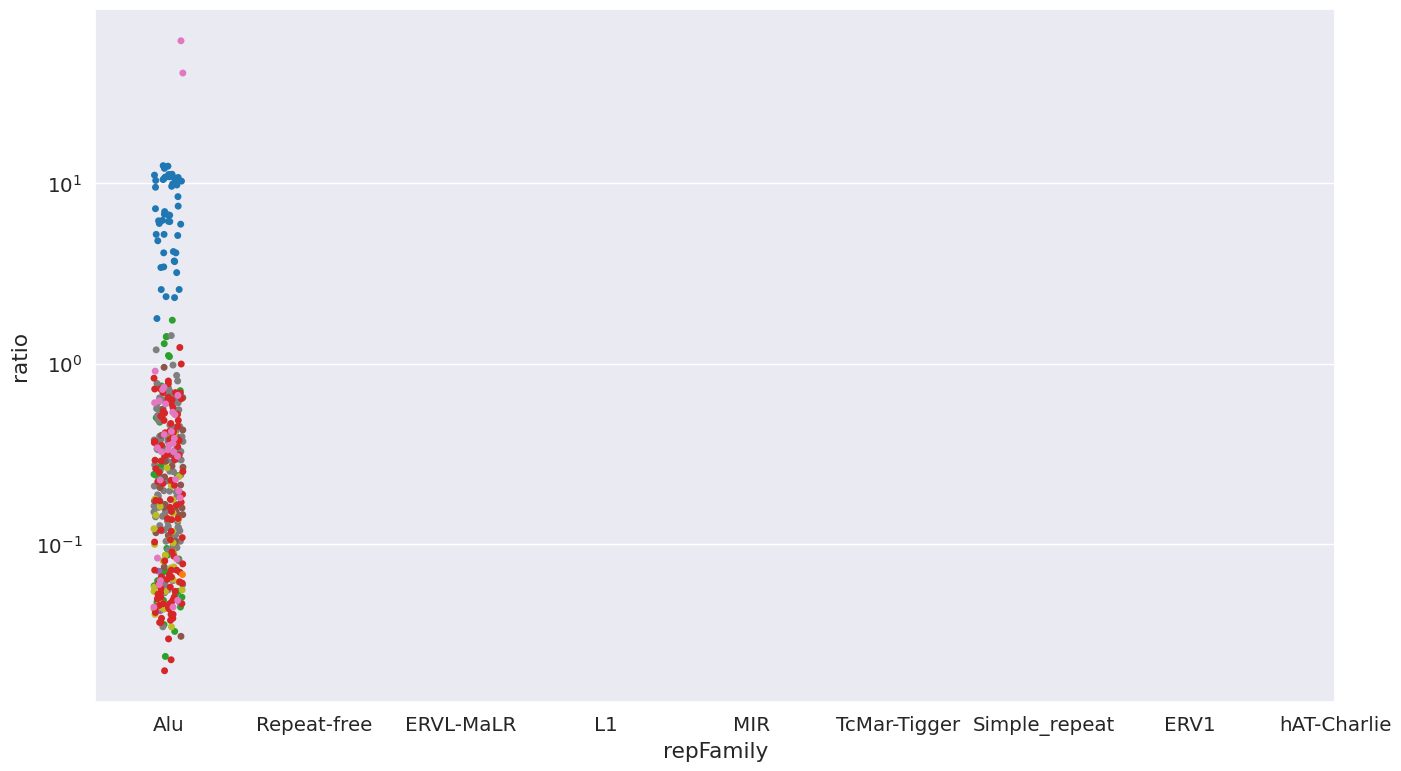

In [280]:
for color, subdf in subdata_new.groupby(by='color'):
    ax = sns.stripplot(x='repFamily', y="ratio", data=subdf, color=color)
    ax.set_yscale("log")
plt.xticks([i for i in range(9)], subdata_new.repFamily.unique())
    #plt.xticks([0], f'{subdf.repFamily.to_list()[0]}')

In [295]:
list(subdata_new.repFamily.unique())

['Alu',
 'Repeat-free',
 'ERVL-MaLR',
 'L1',
 'MIR',
 'TcMar-Tigger',
 'Simple_repeat',
 'ERV1',
 'hAT-Charlie']

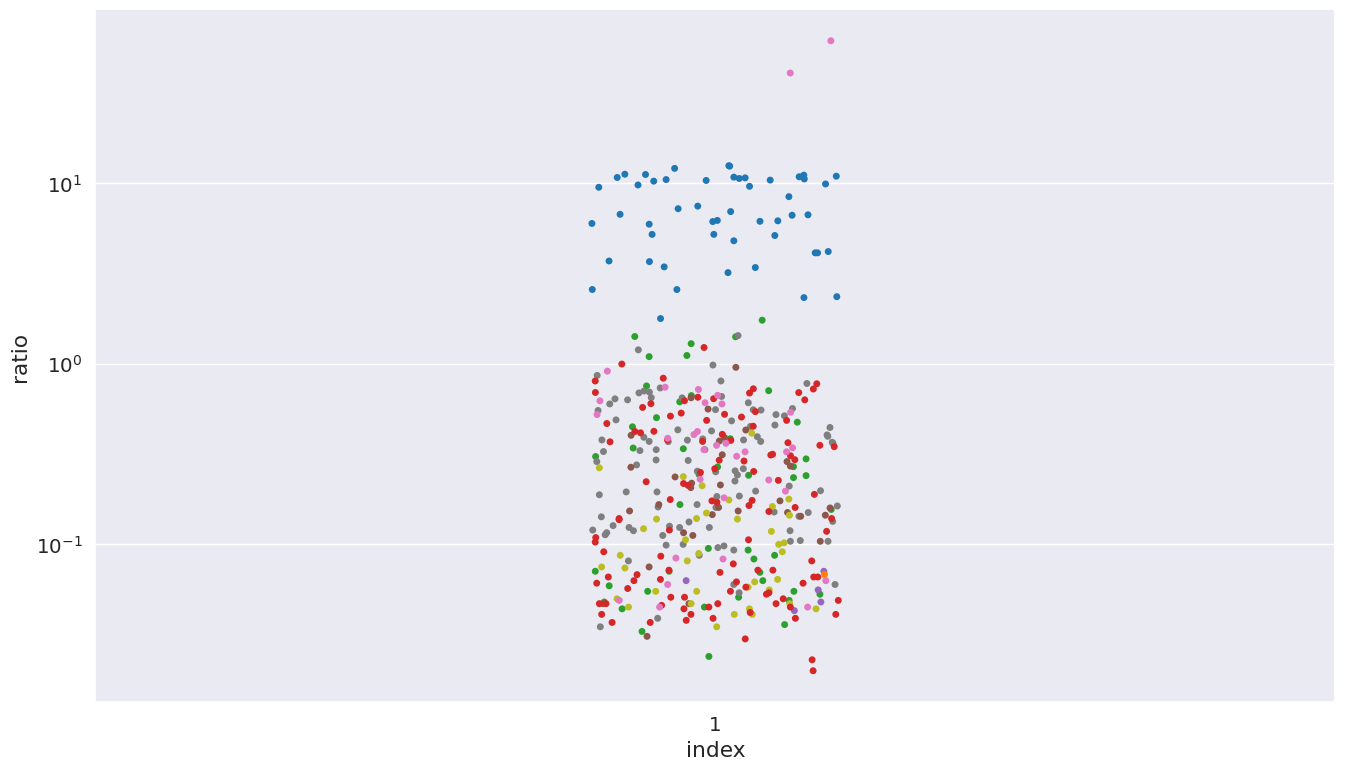

In [299]:
fig, ax = plt.subplots()
labels = list(subdata_new.repFamily.unique())
ax.set_xticks([i for i in range(9)])
ax.set_xticklabels(labels)
subdata_new['index'] = subdata_new['repFamily'].apply(lambda x: labels.index(x))

for color, subdf in subdata_new.groupby(by='color'):
    ax = sns.stripplot(x='index', y="ratio", data=subdf, color=color)
    ax.set_yscale("log")

In [339]:
for color_alpha, subdf in subdata_new.groupby(by=['color', 'alpha']):
    color = color_alpha[0]
    alpha = color_alpha[1]
    print(alpha)

1.0
0.5
1.0
0.5
1.0
0.5
0.5
0.5
0.5
1.0
0.5
1.0
0.5


In [ ]:
[a if a > 0 else b for a in angles]

In [371]:
framing_list = ['-' if i == 1 else '--' for i in subdata_new.alpha.to_list()]
framing_list

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '--',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '--',
 '-',
 '-',
 '--',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '--',
 '--',
 '--',
 '-',
 '--',
 '-',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '-',
 '-',
 '--',
 '--',
 '-',
 '--',
 '--',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '--',
 '-',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--

In [372]:
subdata_new['fram'] = framing_list

In [385]:
markeredgecolor_list = ['*' if i == 1 else '.' for i in subdata_new.alpha.to_list()]
markeredgecolor_list

['*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '.',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '.',
 '*',
 '*',
 '.',
 '*',
 '*',
 '*',
 '*',
 '*',
 '*',
 '.',
 '.',
 '.',
 '*',
 '.',
 '*',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '*',
 '*',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.',
 '*',
 '.',
 '.',
 '.',
 '.',
 '.'

In [386]:
subdata_new['markeredgecolor'] = markeredgecolor_list

In [399]:
size_list = [12 if i == 1 else 8 for i in subdata_new.alpha.to_list()]
size_list

[12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 8,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 8,
 12,
 12,
 8,
 12,
 12,
 12,
 12,
 12,
 12,
 8,
 8,
 8,
 12,
 8,
 12,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 12,
 12,
 8,
 8,
 12,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 12,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [400]:
subdata_new['size'] = size_list

In [401]:
subdata_new

,RepName,p_value,pval_adj,repFamily,ratio,alpha,color,index,framing_list,fram,markeredgecolor,size
0,AluJb,0.000,0.0,Alu,12.429,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,--,-,*,12
1,AluSx1,0.000,0.0,Alu,11.016,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,--,-,*,12
2,AluSx,0.000,0.0,Alu,11.107,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,--,-,*,12
3,AluSz,0.000,0.0,Alu,12.011,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,--,-,*,12
4,AluJr,0.000,0.0,Alu,10.644,1.0,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,--,-,*,12
...,...,...,...,...,...,...,...,...,...,...,...,...
414,MLT1G,1.000,1.0,ERVL-MaLR,0.036,0.5,"(0.17254901960784313, 0.6274509803921569, 0.17...",2,None,--,.,8
415,Charlie17,1.000,1.0,hAT-Charlie,0.162,0.5,"(0.7372549019607844, 0.7411764705882353, 0.133...",8,None,--,.,8
416,LTR27E,1.000,1.0,ERV1,0.371,0.5,"(0.4980392156862745, 0.4980392156862745, 0.498...",7,None,--,.,8
417,MER90,1.000,1.0,ERV1,0.150,0.5,"(0.4980392156862745, 0.4980392156862745, 0.498...",7,None,--,.,8


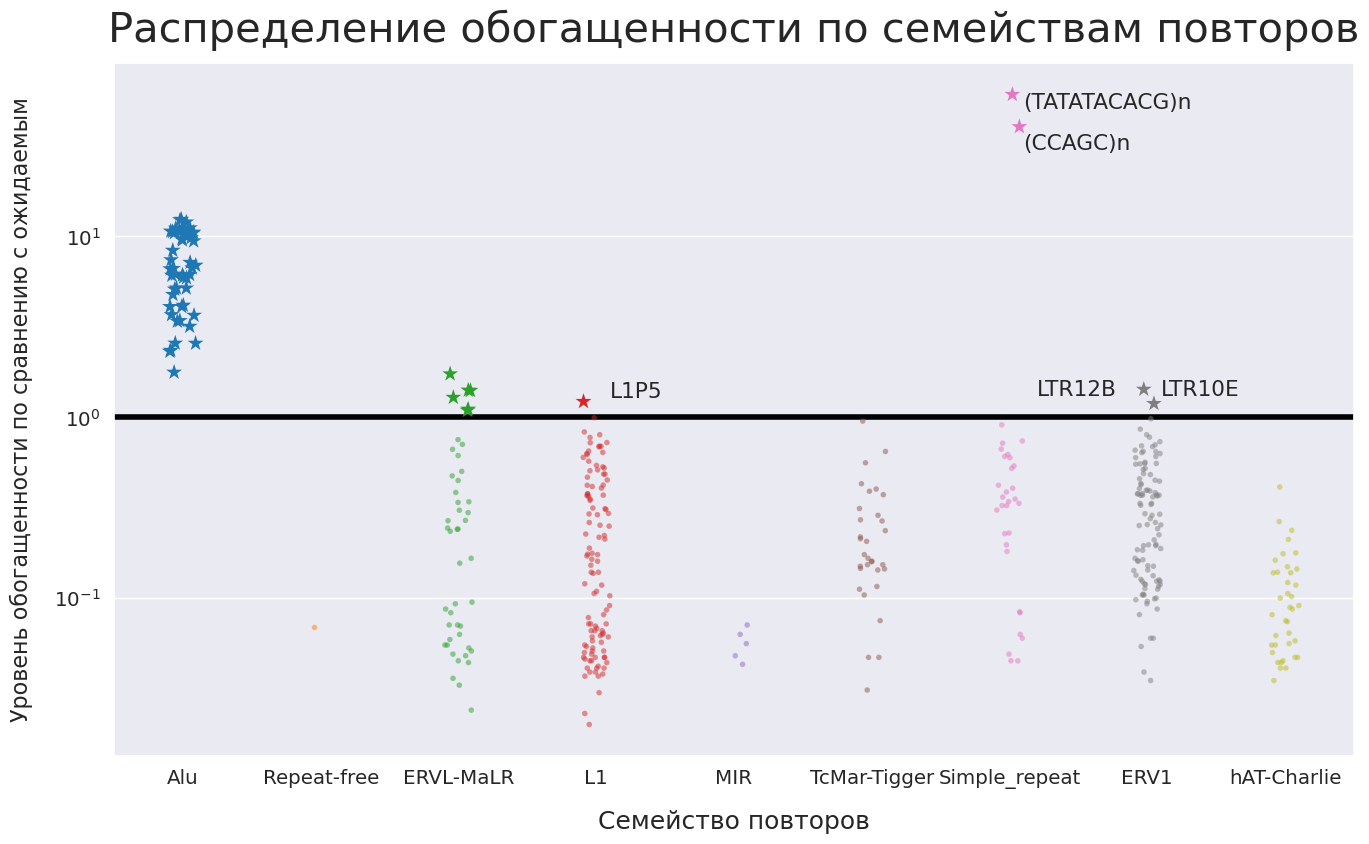

In [406]:
fig, ax = plt.subplots()
labels = list(subdata_new.repFamily.unique())

for color_alpha_marker_size, subdf in subdata_new.groupby(by=['color', 'alpha', 'markeredgecolor', 'size']):
    color = color_alpha_marker_size[0]
    alpha = color_alpha_marker_size[1]
    marker = color_alpha_marker_size[2]
    size = color_alpha_marker_size[3]
    color_hex = matplotlib.colors.to_hex(color, keep_alpha=True)
    ax = sns.stripplot(x='repFamily', y="ratio", data=subdf, color=color_hex, order=labels, alpha=alpha, marker=marker, size=size, ax=ax)
ax.set_yscale("log")
ax.set_title('Распределение обогащенности по семействам повторов', fontsize=30, pad=15)
ax.set_ylabel("Уровень обогащенности по сравнению с ожидаемым",fontsize=16, labelpad=15)
ax.set_xlabel("Семейство повторов",fontsize=18, labelpad=15)
#plt.scatter(3, 1.288, color = 'red', marker="+", linewidths=20)
plt.text(3.1, 1.288, 'L1P5')

#plt.scatter(6, 22.75, color = 'purple', marker="+", linewidths=20)
plt.text(6.1, 30, '(CCAGC)n')
#plt.scatter(6., 122.00, color = 'purple', marker="+", linewidths=20)
plt.text(6.1, 51.00, '(TATATACACG)n')

#plt.scatter(7, 1.309, color = 'gray', marker="+", linewidths=20)
plt.text(7.1, 1.309, 'LTR10E')
plt.text(6.2, 1.309, 'LTR12B')
plt.axhline(y=1, linewidth=4, color='black')
plt.show()
fig.savefig(f"{path}/images/Распределение обогащенности по семейcтвам повторов с учетом стат значимости.jpg")

In [ ]:
fig, ax = plt.subplots()
labels = ["Alu", ...]
ax.set_xticks(list(len(range)))
ax.set_xticklabels(labels)
df['index'] = df['repFamily'].apply(lambda x: labels.index(x))

for color, subdf in subdata_new.groupby(by='color'):
    ax = sns.stripplot(x='index', y="ratio", data=subdf, color=color)

ax.set_yscale("log")

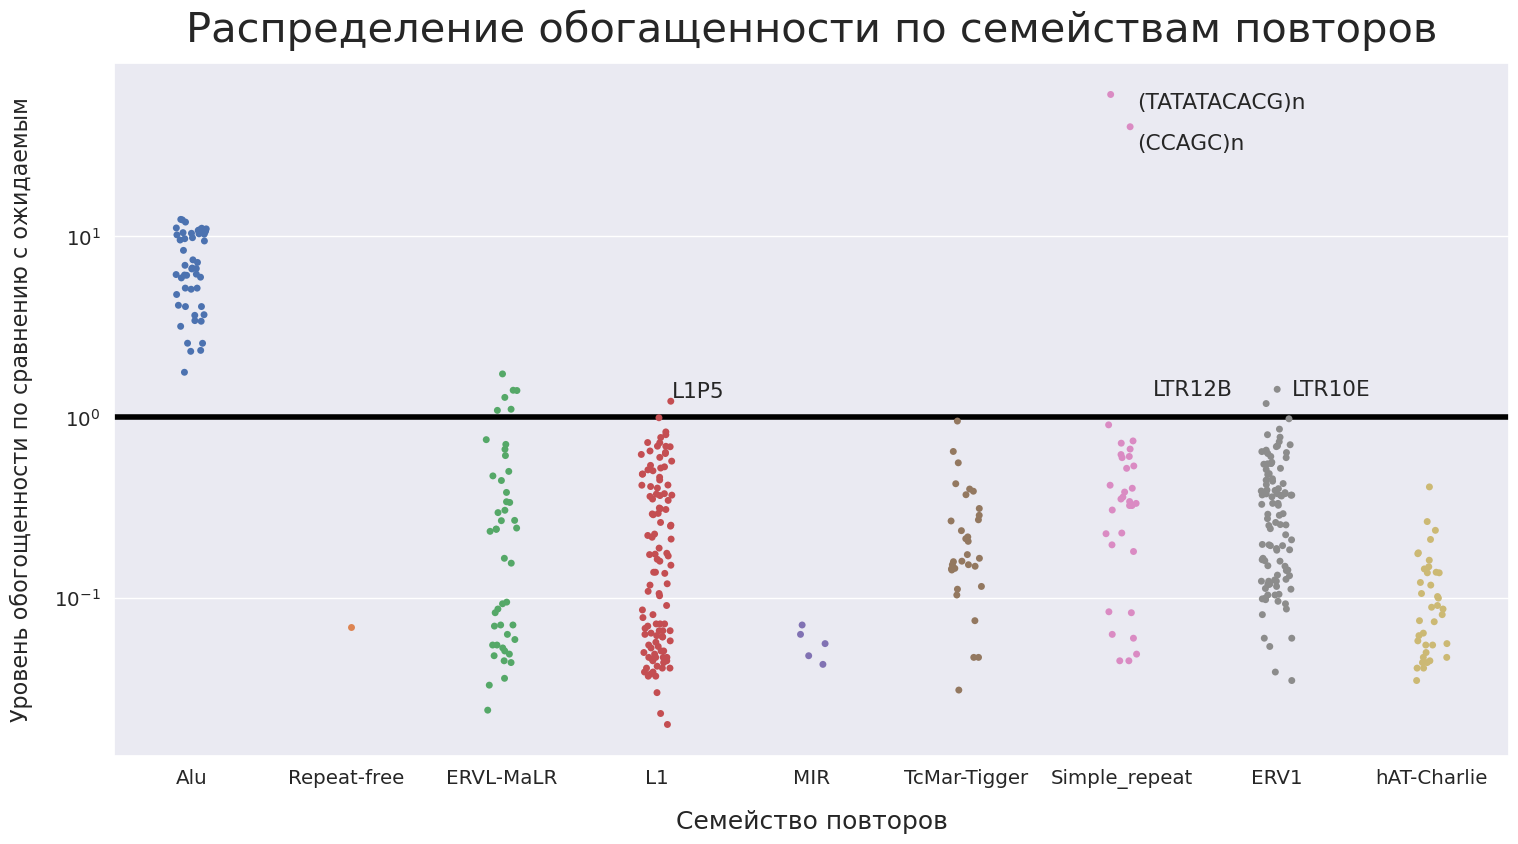

In [405]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale = 1.3)
fig, ax = plt.subplots(figsize=(18, 9))
sns.stripplot(x='repFamily', y="ratio", data=subdata_new, ax=ax)
ax.set_yscale("log")
ax.set_title('Распределение обогащенности по семействам повторов', fontsize=30, pad=15)
ax.set_ylabel("Уровень обогощенности по сравнению с ожидаемым",fontsize=16, labelpad=15)
ax.set_xlabel("Семейство повторов",fontsize=18, labelpad=15)
#plt.scatter(3, 1.288, color = 'red', marker="+", linewidths=20)
plt.text(3.1, 1.288, 'L1P5')

#plt.scatter(6, 22.75, color = 'purple', marker="+", linewidths=20)
plt.text(6.1, 30, '(CCAGC)n')
#plt.scatter(6., 122.00, color = 'purple', marker="+", linewidths=20)
plt.text(6.1, 51.00, '(TATATACACG)n')

#plt.scatter(7, 1.309, color = 'gray', marker="+", linewidths=20)
plt.text(7.1, 1.309, 'LTR10E')
plt.text(6.2, 1.309, 'LTR12B')
plt.axhline(y=1, linewidth=4, color='black')
plt.show()
#fig.savefig(f"{path}/images/Распределение обогащенности по семейcтвам повторов.jpg")

In [54]:
p_value_by_repName_FDR[p_value_by_repName_FDR.pval_adj < 0.01]

,RepName,p_value,pval_adj
0,AluJb,0.0,0.0
1,AluSx1,0.0,0.0
2,AluSx,0.0,0.0
3,AluSz,0.0,0.0
4,AluJr,0.0,0.0
...,...,...,...
531,MamRep564,0.0,0.0
532,Charlie17,0.0,0.0
533,LTR27E,0.0,0.0
534,MER90,0.0,0.0


In [55]:
p_value_by_repName_FDR.query("RepName == '(TATATACACG)n'")

,RepName,p_value,pval_adj
497,(TATATACACG)n,0.0,0.0


In [56]:
mask = subdata.repName[p_value_by_repName_FDR.pval_adj < 0.001]
mask

0          AluJb
1         AluSx1
2          AluSx
3          AluSz
4          AluJr
         ...    
414        MLT1G
415    Charlie17
416       LTR27E
417        MER90
418        MER6C
Name: repName, Length: 412, dtype: object

In [57]:
subdata_with_alpha = subdata[mask]
subdata_with_alpha

KeyError: "None of [Index(['AluJb', 'AluSx1', 'AluSx', 'AluSz', 'AluJr', 'AluJo', 'AluY', 'AluSq2',\n       'AluSz6', 'AluSp',\n       ...\n       'Charlie2a', 'LTR48B', 'MLT1O', '(TATATA)n', 'MER61-int', 'MLT1G',\n       'Charlie17', 'LTR27E', 'MER90', 'MER6C'],\n      dtype='object', length=412)] are in the [columns]"